In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In recent years, artificial intelligence (AI) has become a prominent issue in the technical industry. AI has a broad variety of applications, including autonomous or self-driving cars. Thanks to technological breakthroughs, multinational firms such as Google, Tesla, Uber, Ford, Audi, Toyota, Mercedes-Benz, and others are working on automating autos. There are several algorithms for automating autos, and much too much research is carried out on a daily basis. Before you contemplate self-driving cars, think about how they automatically detect things like other cars, persons, animals, roads, and traffic signs like turning left or right, speed restrictions, no passing of large trucks, no entering, children crossing, and so on, and take the proper action. An AI capable of distinguishing numerous items, such as different traffic signals, might be constructed.
The photos of various traffic signs, which are divided into six classes: Cautions, Crossings, Direction, No Entry, and Speed Limit, are necessary for the production of this model.
The act of assigning labels to images based on certain attributes or traits is referred to as "Image Classification." These traits are recognized by the algorithm, which then uses them to discriminate between photographs and assign labels to them. It is accomplished using neural networks, which are a kind of deep learning algorithm. (Menon, 2022)


We compile and build a Convolutional Neural Network.

Expected structure of folder:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Data path of the train data

In [4]:
data_dir = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Train"

Batch size and image hight and width

In [5]:
# Preparing the data set.
batch_size = 40
img_height = 256
img_width = 256

As out data are in folder formet so we can use tensor flow to load data.
Data is divided into training and validation set

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  # start your code here
  data_dir, batch_size= batch_size,image_size=(img_height, img_width),subset = "training", validation_split = 0.2, seed = 1234)
  #End your code here.

Found 16100 files belonging to 5 classes.
Using 12880 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    # start your Code here.
data_dir,batch_size= batch_size,image_size=(img_height, img_width),subset = "validation", validation_split = 0.2, seed = 1234
    # End your Code here.
  )

Found 16100 files belonging to 5 classes.
Using 3220 files for validation.


printing the name of the classes

In [8]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['Cautions', 'Crossings', 'DIrection', 'No Entry', 'SpeedLimit']


Here we are showing the total number of image in class

In [9]:
# how to count the value of each class
cautions = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Train/Cautions"
crossings = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Train/Crossings"
direction = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Train/DIrection"
noentry = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Train/No Entry"
speedlimit = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Train/SpeedLimit"
print("Number of images in class")
print("Cautions: "+ str(len(os.listdir(cautions))))
print("Crossings: "+ str(len(os.listdir(crossings))))
print("Direction: "+ str(len(os.listdir(direction))))
print("No Entry: "+ str(len(os.listdir(noentry))))
print("SpeedLimit: "+ str(len(os.listdir(speedlimit))))

Number of images in class
Cautions: 1678
Crossings: 1828
Direction: 2968
No Entry: 2938
SpeedLimit: 6688


Here showing the images of each class

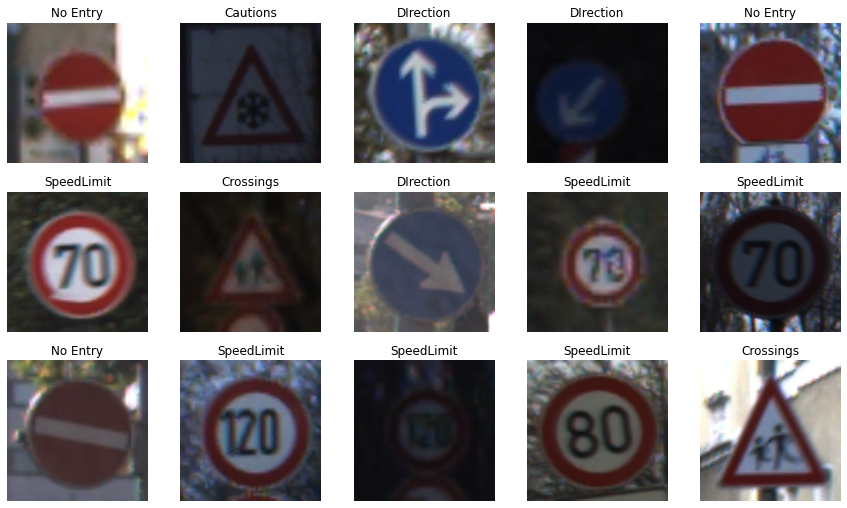

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(40, 256, 256, 3)
(40,)


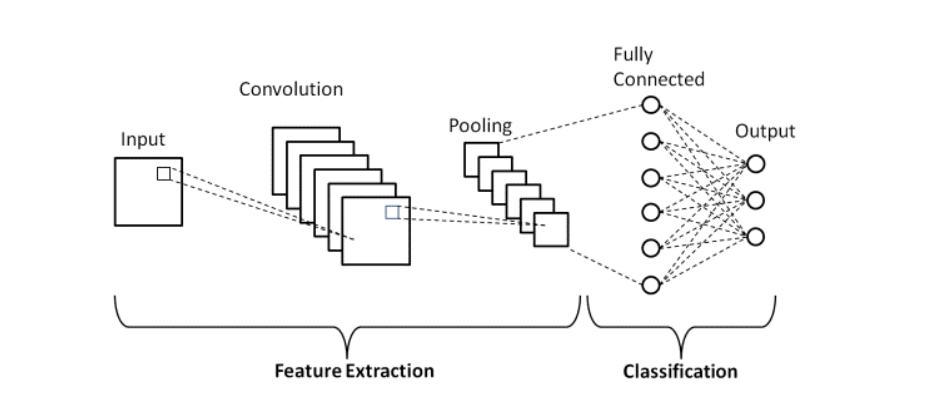

Building the CNN:
Our architecture will be

[Conv * 3 -- Act(Relu) * 3 -- MaxPool *3 ] -- Flatten -- [FC]

i.e.

We build three layers of Convulational layer followed by acitvation and maxpooling. In fully connected layer we have one hidden units with 128 neurons. and outputlayer with neurons equal to num_classes.

Number of Filters:

First Layer: 16

Second Layer: 32

Third Layer: 64

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # start your code here.
  #Second layer
 layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #End your code here

  #start your code here
  # Third Layer
 layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #End your code here
  #Fully Connected layer
  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

Complie model:

This means getting our model ready for training. As described we will be using Adam optimization with SparseCategoricalCrossentripy as loss function, accuracy is used as the measure of evaluation metrics for our model.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Showing the summary of the reports

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

As we have form large number of image. So we are using GPU for runing the model

In [16]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Here we have 15 epochs and fitting the training data into model

In [17]:
epochs=15
history = model.fit(
  # start your code here
train_ds,validation_data=val_ds,epochs=epochs
  # End your code here
)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


322/322 [==============================] - 39s 110ms/step - loss: 0.3480 - accuracy: 0.8661 - val_loss: 0.1217 - val_accuracy: 0.9553
Epoch 2/15
322/322 [==============================] - 36s 109ms/step - loss: 0.0970 - accuracy: 0.9643 - val_loss: 0.0824 - val_accuracy: 0.9699
Epoch 3/15
322/322 [==============================] - 36s 110ms/step - loss: 0.0587 - accuracy: 0.9800 - val_loss: 0.1127 - val_accuracy: 0.9624
Epoch 4/15
322/322 [==============================] - 36s 109ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 5/15
322/322 [==============================] - 36s 109ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0263 - val_accuracy: 0.9907
Epoch 6/15
322/322 [==============================] - 36s 109ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 7/15
322/322 [==============================] - 36s 109ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.0956 - val_accuracy: 0.9

Here we are check the accuracy and loss function

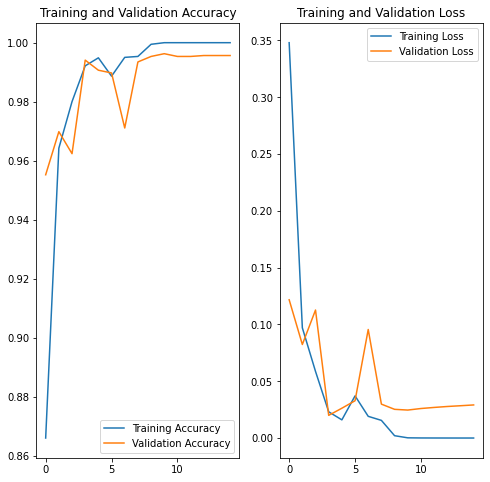

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Here we are taking the path of test data

In [19]:
data_dir_test = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Test"

Here we are loding the test data.

In [20]:
test = tf.keras.utils.image_dataset_from_directory(data_dir_test,seed = 42)

Found 86 files belonging to 5 classes.


Here we are fiting the test data in the model and finding the accuracy of our model by the help of confusion matrix and classification report

In [21]:
all_prediction = model.predict(test)

In [22]:
predicted_label =[]
for i in all_prediction:
  predicted_label.append(test.class_names[i.argmax()])

In [23]:
label = []
for imgs, labels in test:
  for i in range(len(imgs)):
    # print(len(img))
    label.append(class_names[labels[i]])

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(label,predicted_label)

array([[ 1,  0,  5,  3,  4],
       [ 1,  1,  2,  0,  2],
       [ 2,  3,  2,  3,  9],
       [ 2,  0,  4,  6,  4],
       [ 7,  2,  6,  4, 13]])

In [27]:
print(classification_report(label,predicted_label))

              precision    recall  f1-score   support

    Cautions       0.08      0.08      0.08        13
   Crossings       0.17      0.17      0.17         6
   DIrection       0.11      0.11      0.11        19
    No Entry       0.38      0.38      0.38        16
  SpeedLimit       0.41      0.41      0.41        32

    accuracy                           0.27        86
   macro avg       0.23      0.23      0.23        86
weighted avg       0.27      0.27      0.27        86



Here we are testing data of all classes.

This image most likely belongs to Cautions with a 40.46 percent confidence.


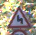

In [30]:
data_dir_test1 = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Test/Cautions/00021_00000_00002.png"


img = tf.keras.utils.load_img(data_dir_test1,target_size=(img_height,img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(data_dir_test1)

This image most likely belongs to Crossings with a 40.46 percent confidence.


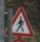

In [31]:
data_dir_test2 = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Test/Crossings/00027_00003_00000.png"


img = tf.keras.utils.load_img(data_dir_test2,target_size=(img_height,img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(data_dir_test2)

This image most likely belongs to DIrection with a 40.46 percent confidence.


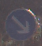

In [32]:
data_dir_test3 = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Test/DIrection/00038_00004_00019.png"


img = tf.keras.utils.load_img(data_dir_test3,target_size=(img_height,img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(data_dir_test3)

This image most likely belongs to SpeedLimit with a 40.46 percent confidence.


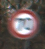

In [34]:
data_dir_test5 = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Test/SpeedLimit/00004_00017_00025.png"


img = tf.keras.utils.load_img(data_dir_test5,target_size=(img_height,img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(data_dir_test5)

In [33]:
data_dir_test4 = "/content/drive/MyDrive/Dataset_Compressed/Traffic_Sign_-2/Test/No Entry/00015_00013_00001.png"


img = tf.keras.utils.load_img(data_dir_test4,target_size=(img_height,img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(data_dir_test4)

This image most likely belongs to No Entry with a 40.46 percent confidence.
